# 状態密度の計算

$k$次元系で、エネルギー固有値が

$$
E_(n_1, \ldots, n_k ) = \sum_{l = 1}^{k} \cos \left(\frac{2 \pi n_l}{N} \right)
$$

で与えられる系の状態密度を計算する。このシートでは$ k = 1,2,3$についてを求める。

## 理論

状態密度は次の式で定義される：

$$
D( E ) = \sum_{\boldsymbol{k}} \delta ( E - \Eplison_{\boldsymbol{k} } )
$$



## 1次元系について

エネルギー固有値は

$$
E_n = -2t \cos ( \frac{2 \pi n }{N})
$$

で与えられる。エネルギーの範囲は$[-2t , 2t]$となる。

In [15]:
import matplotlib.pyplot as plt
import numpy as np
class Calculate:
    def __init__(self, dimension, time, Emin, Emax, dens: bool = True):
        self.dens = dens
        self.L = 100
        self.N = int( time**(1/dimension))
        self.dim = dimension
        self.Es = np.linspace(Emin, Emax, self.L)
        self.hist = self.__get_hist()
    def N_dim_sumation(self, one_dim_array):
        def __pinch_it_with_bracket(content, times):
            for _ in range(times - 1):
                content = [ content]
            return content
        
        result = __pinch_it_with_bracket(np.copy(one_dim_array), 1)
        for times in range(2, self.dim + 1):
            result = result + np.array(
                __pinch_it_with_bracket(
                    np.copy(one_dim_array),
                    times
                )
            ).T
        return result
    
    def get_eigens(self):
        return self.N_dim_sumation(
            np.cos( 2 * np.pi /self.N * np.arange(self.N))
            )

    def __get_hist(self):
        place =  np.searchsorted(self.Es, self.get_eigens())
        hist = np.histogram(place, bins=np.arange(self.L + 1), density=self.dens)
        return hist[0]

def plotter(dim):
    calc = Calculate(dim, 220000000, -dim, dim, False)
    plt.plot(calc.Es, calc.hist)
    

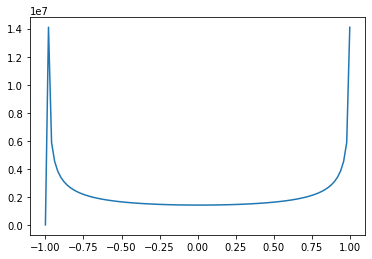

In [16]:
plotter(1)

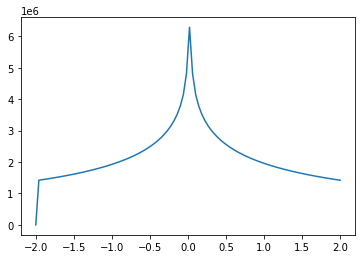

In [17]:
plotter(2)

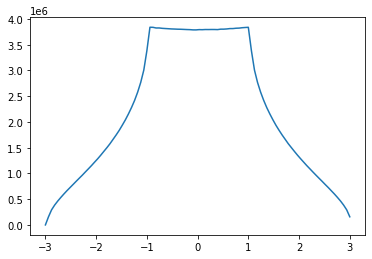

In [18]:
plotter(3)

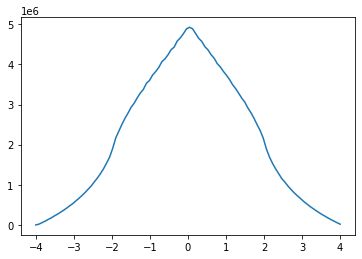

In [19]:
plotter(4)

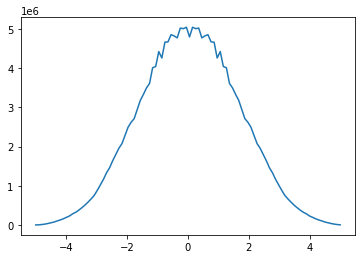

In [20]:
plotter(5)

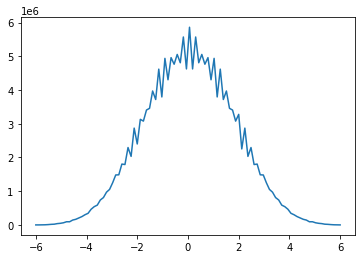

In [21]:
plotter(6)

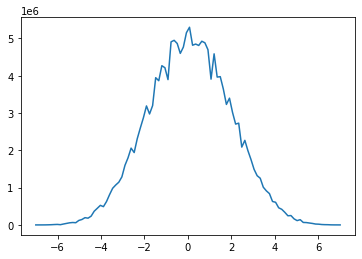

In [22]:
plotter(7)

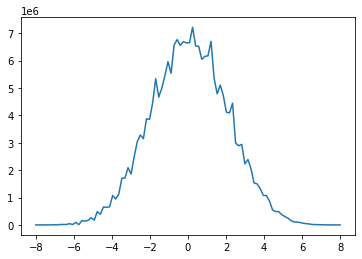

In [23]:
plotter(8)

In [ ]:
plotter(8)